# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
#sns.set_palette("rocket")

HEIGHT = 3
ASPECT = 2

## Baseline Methods

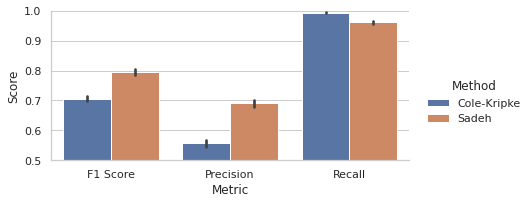

In [2]:
data = pd.read_csv("results/exp01_baseline.csv")
data = data.groupby(["Method", "Fold"])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].aggregate("mean").reset_index()

scores = pd.melt(data, id_vars=['Method'],
                 value_vars=['F1 Score', 'Precision', 'Recall'],
                 var_name='Metric', value_name='Score')

g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=scores, height=HEIGHT, aspect=ASPECT)
g.set(ylim=(.5,1))

plt.tight_layout(rect=(0,0,.8,1))

## Triaxial Models

### Hyperparameters

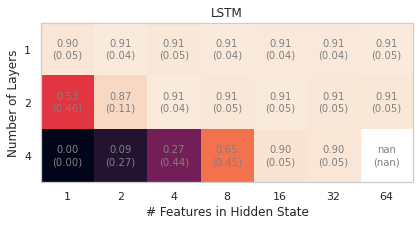

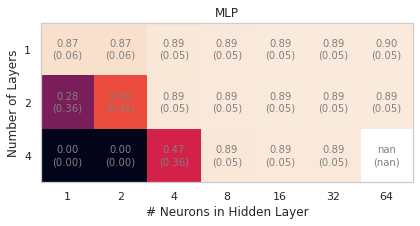

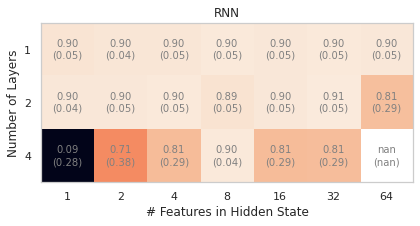

In [3]:
data = pd.read_csv("results/exp02_test.csv")

data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:,"# Features in Hidden State"] = data["Hidden Dimension"]


tmp = data.loc[data["Model"] != "GLM", :]
scores = pd.melt(tmp, id_vars=["Fold", "# Features in Hidden State", 'Number of Layers', 'Model'],
               value_vars=['F1 Score', 'Precision', 'Recall'],
               var_name='Metric', value_name='Score')

agg = scores.groupby(["# Features in Hidden State", 'Number of Layers', 'Metric', 'Model'])["Score"].aggregate(["mean","std"]).reset_index()
agg = agg.sort_values(by=["Model", 'Number of Layers', "# Features in Hidden State"])

agg = agg.loc[agg["Metric"] == "F1 Score",:].reset_index(drop=True)


for model in agg["Model"].unique():
    tmp = agg.loc[(agg["Model"] == model), :]

    n_layers = tmp["Number of Layers"].unique()
    hid_dim = tmp["# Features in Hidden State"].unique()

    means = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="mean").values
    stds = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="std").values

    fig = plt.figure(figsize=(HEIGHT * 2, 2 * HEIGHT * ASPECT))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)
    im = ax.imshow(means, cmap="rocket")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(hid_dim)))
    ax.set_yticks(np.arange(len(n_layers)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(hid_dim)
    ax.set_yticklabels(n_layers)

    plt.xlabel('# Features in Hidden State') if model != "MLP" else plt.xlabel('# Neurons in Hidden Layer')
    plt.ylabel('Number of Layers')

    # Loop over data dimensions and create text annotations.
    for i in range(len(n_layers)):
        for j in range(len(hid_dim)):
            text = ax.text(j, i, f"{means[i, j]:.2f}\n({stds[i, j]:.2f})",
                           ha="center", va="center", color="grey", size=10)

    ax.set_title(model)
    plt.tight_layout()

### Best models

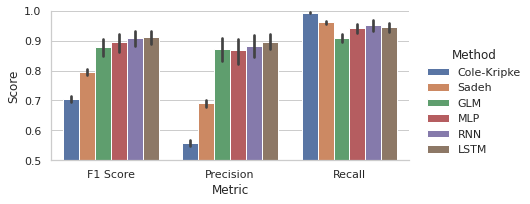

In [4]:
data = pd.read_csv("results/exp02_test.csv")
data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:, "Method"] = data["Model"]

# Select columns of interest
columns = ['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Method']

# Get best models (see plots above)
glm = data.loc[data["Method"] == "GLM", columns]
best_mlp = data.loc[(data["Method"] == "MLP") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 64), columns]
best_rnn = data.loc[(data["Method"] == "RNN") & (data["Number of Layers"] == 2) & (data["Hidden Dimension"] == 32), columns]
best_lstm = data.loc[(data["Method"] == "LSTM") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 2), columns]

# Load baseline data
baseline = pd.read_csv("results/exp01_baseline.csv")
baseline = baseline.groupby(["Method", "Fold"])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].aggregate("mean").reset_index()

# Concat results
results = pd.concat([baseline, glm, best_mlp, best_rnn, best_lstm])
results = pd.melt(results, id_vars=['Method'],
                  value_vars=['F1 Score', 'Precision', 'Recall'],
                  var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=results, height=HEIGHT, aspect=ASPECT)
g.set(ylim=(.5,1))
plt.tight_layout(rect=(0,0,.8,1))

## Powerspec Models

### Hyperparameters

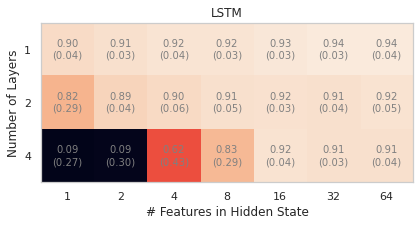

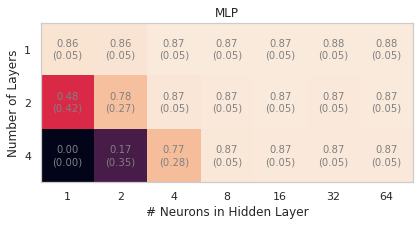

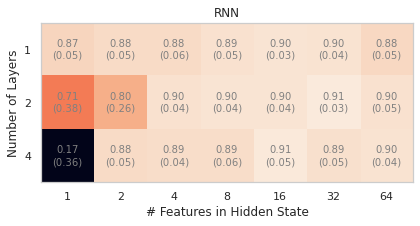

In [5]:
data = pd.read_csv("results/exp03_test.csv")

data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:,"# Features in Hidden State"] = data["Hidden Dimension"]


tmp = data.loc[data["Model"] != "GLM", :]
scores = pd.melt(tmp, id_vars=["Fold", "# Features in Hidden State", 'Number of Layers', 'Model'],
               value_vars=['F1 Score', 'Precision', 'Recall'],
               var_name='Metric', value_name='Score')

agg = scores.groupby(["# Features in Hidden State", 'Number of Layers', 'Metric', 'Model'])["Score"].aggregate(["mean","std"]).reset_index()
agg = agg.sort_values(by=["Model", 'Number of Layers', "# Features in Hidden State"])

agg = agg.loc[agg["Metric"] == "F1 Score",:].reset_index(drop=True)


for model in agg["Model"].unique():
    tmp = agg.loc[(agg["Model"] == model), :]

    n_layers = tmp["Number of Layers"].unique()
    hid_dim = tmp["# Features in Hidden State"].unique()

    means = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="mean").values
    stds = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="std").values

    fig = plt.figure(figsize=(HEIGHT * 2, 2 * HEIGHT * ASPECT))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)
    im = ax.imshow(means, cmap="rocket")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(hid_dim)))
    ax.set_yticks(np.arange(len(n_layers)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(hid_dim)
    ax.set_yticklabels(n_layers)

    plt.xlabel('# Features in Hidden State') if model != "MLP" else plt.xlabel('# Neurons in Hidden Layer')
    plt.ylabel('Number of Layers')

    # Loop over data dimensions and create text annotations.
    for i in range(len(n_layers)):
        for j in range(len(hid_dim)):
            text = ax.text(j, i, f"{means[i, j]:.2f}\n({stds[i, j]:.2f})",
                           ha="center", va="center", color="grey", size=10)

    ax.set_title(model)
    plt.tight_layout()

### Best models

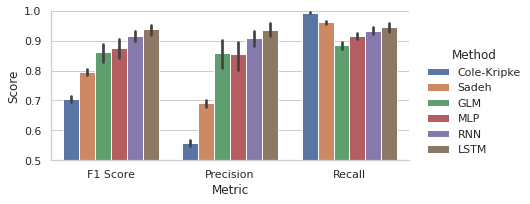

In [16]:
data = pd.read_csv("results/exp03_test.csv")
data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:, "Method"] = data["Model"]

# Select columns of interest
columns = ['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Method']

# Get best models (see plots above)
glm = data.loc[data["Method"] == "GLM", columns]
best_mlp = data.loc[(data["Method"] == "MLP") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 32), columns]
best_rnn = data.loc[(data["Method"] == "RNN") & (data["Number of Layers"] == 2) & (data["Hidden Dimension"] == 32), columns]
best_lstm = data.loc[(data["Method"] == "LSTM") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 32), columns]

# Load baseline data
baseline = pd.read_csv("results/exp01_baseline.csv")
baseline = baseline.groupby(["Method", "Fold"])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].aggregate("mean").reset_index()

# Concat results
results = pd.concat([baseline, glm, best_mlp, best_rnn, best_lstm])
results = pd.melt(results, id_vars=['Method'],
                  value_vars=['F1 Score', 'Precision', 'Recall'],
                  var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=results, height=HEIGHT, aspect=ASPECT)
g.set(ylim=(.5,1))
plt.tight_layout(rect=(0,0,.8,1))

## Summary